# Data PreProcessing 

# Data Loading

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Load the wine equality dataset into pandas 
data = pd.read_csv('happiness_score_dataset.csv')

# Display the first few rows
#print(data.head(20))
data.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# Data Exploring

In [2]:
# display data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [3]:
# Get summary statistics
print(data.describe)

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

In [4]:
## Display the total number of records in the dataframe
len(data)

158

In [5]:
# Check for missing values
print(data.isnull().sum()) #no missing values 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


# Explotary Data Analysis

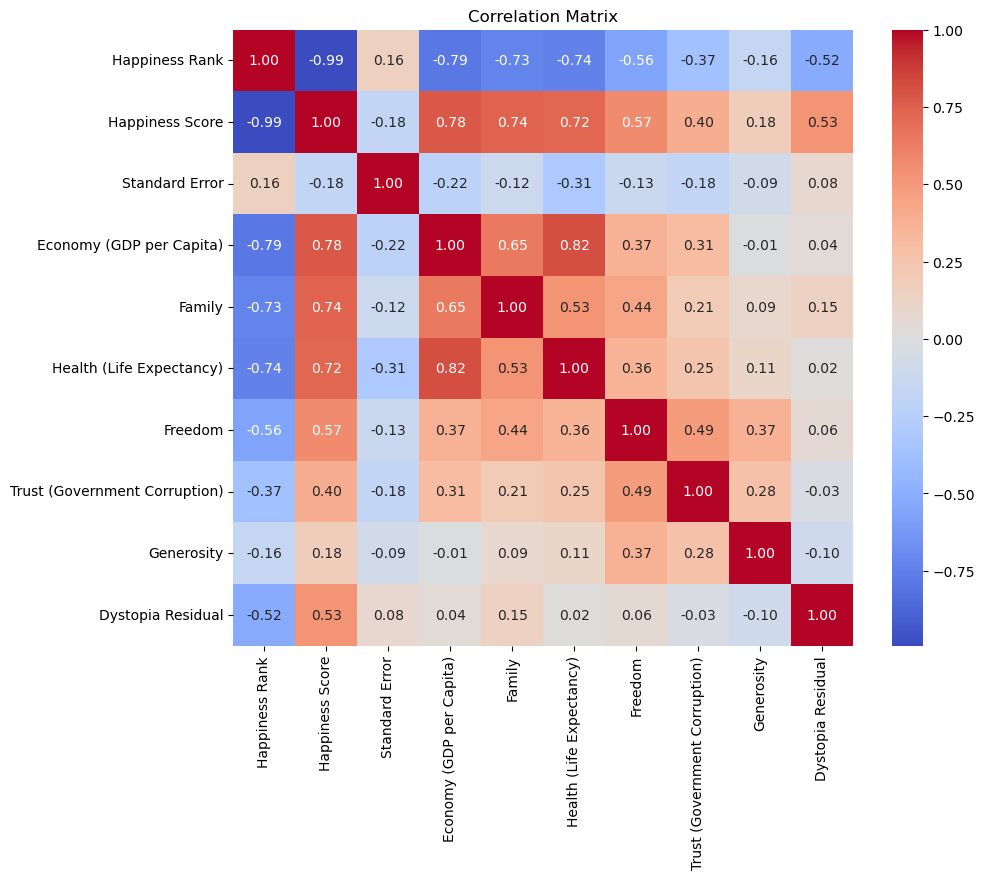

In [6]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

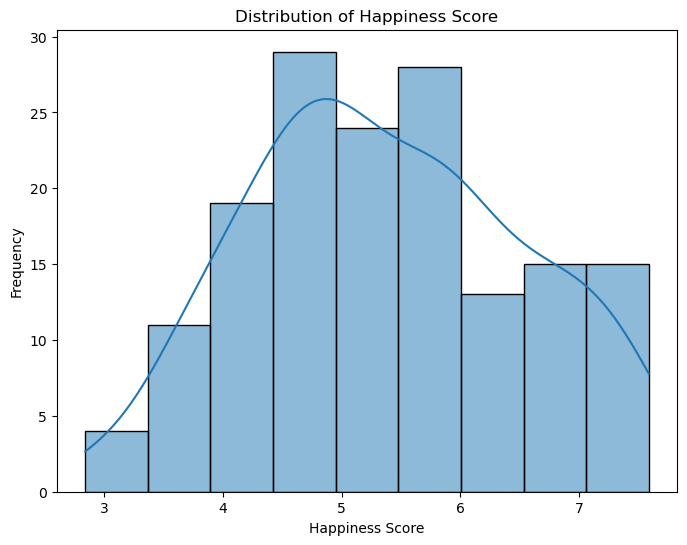

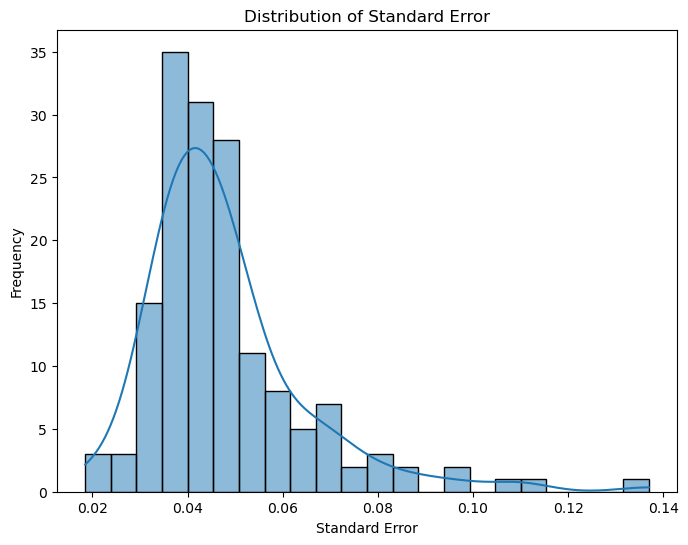

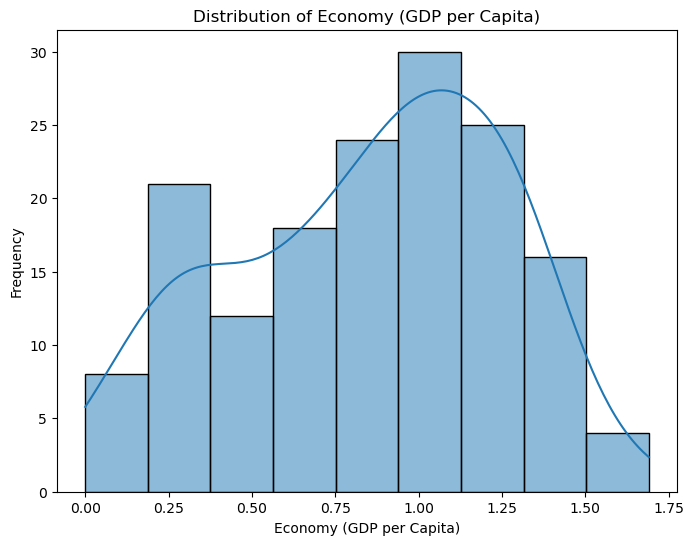

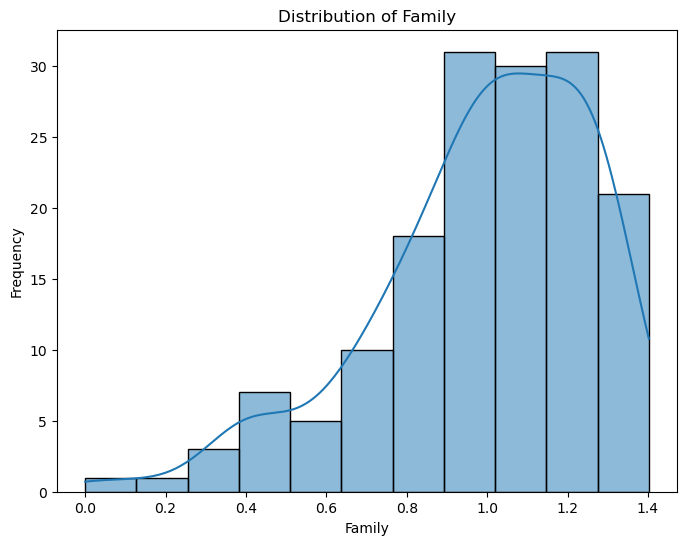

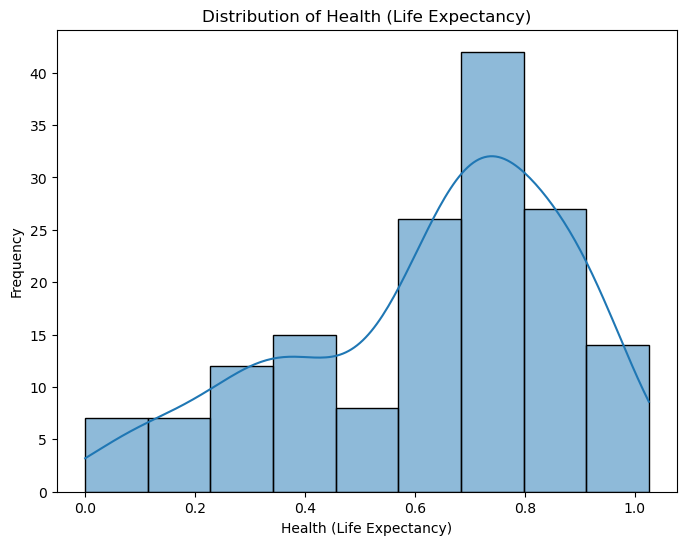

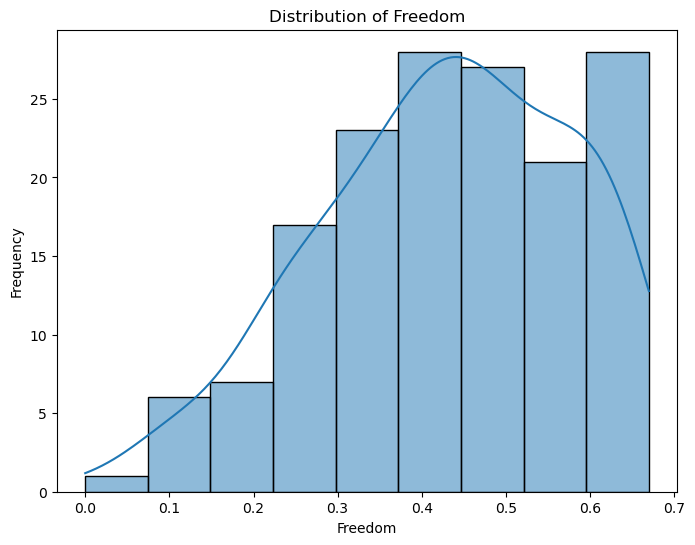

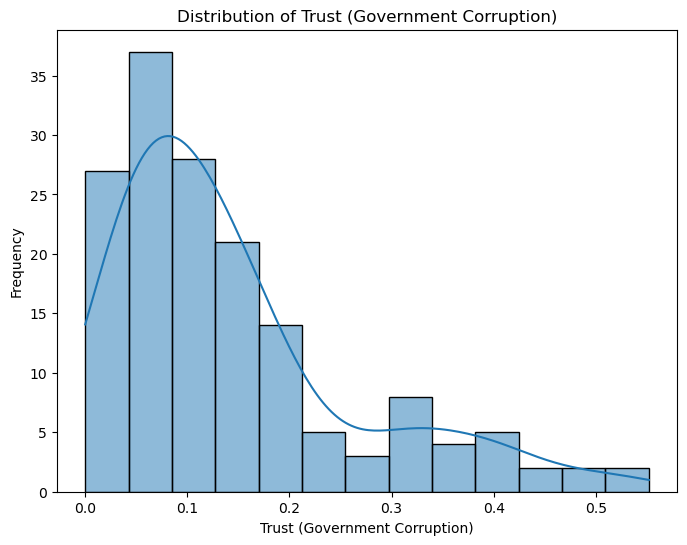

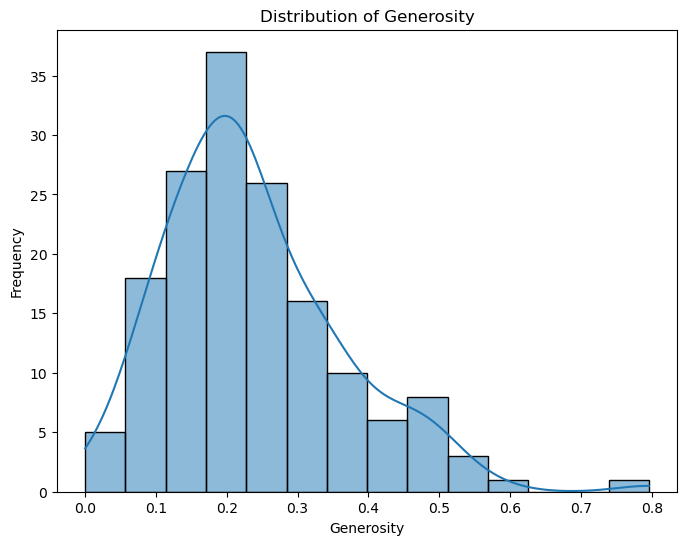

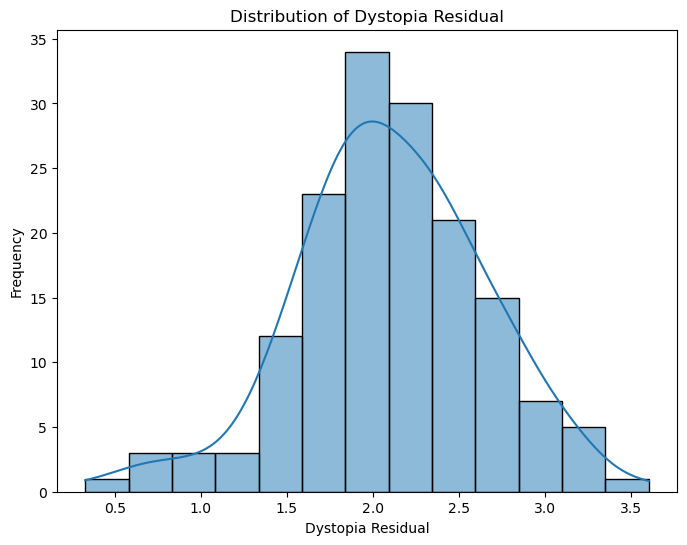

In [7]:
# Distribution Plots
numerical_features = ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 
                      'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                      'Dystopia Residual']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


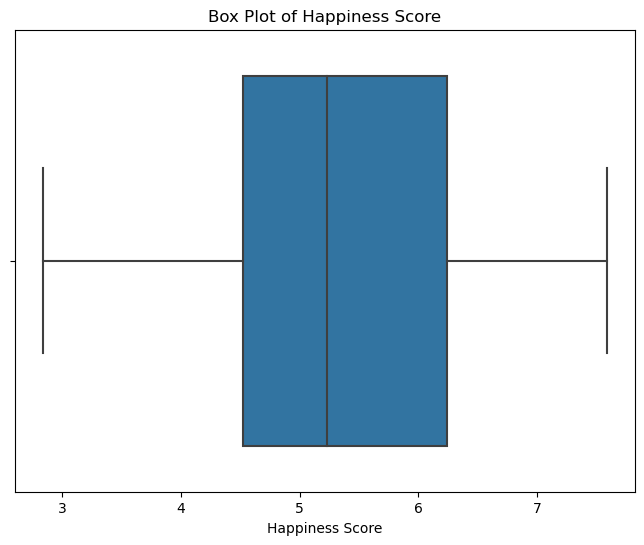

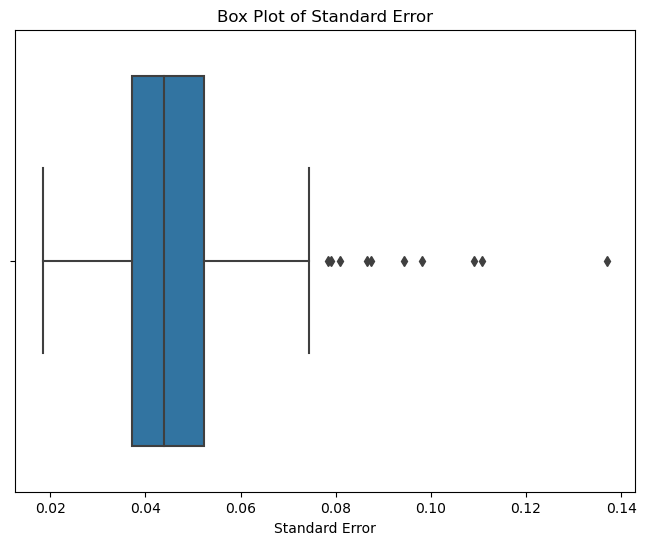

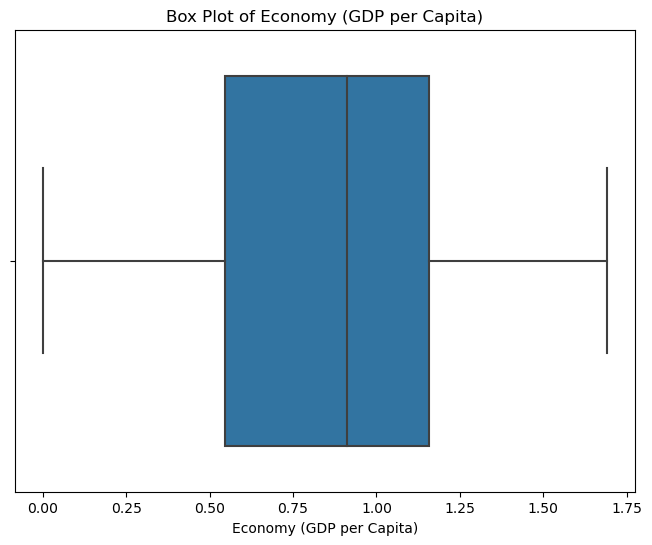

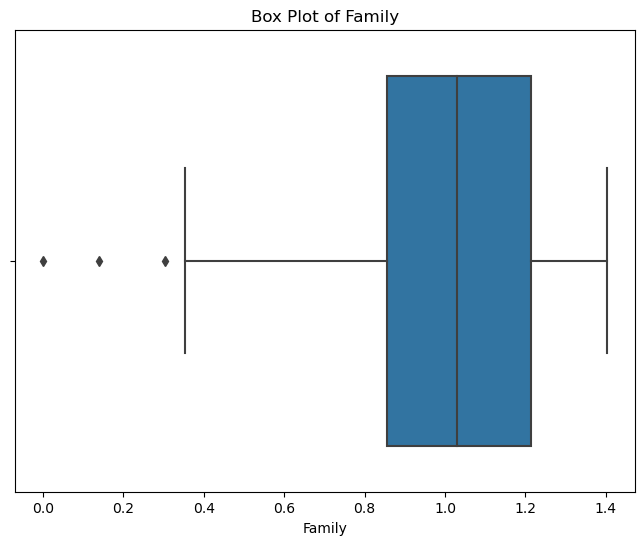

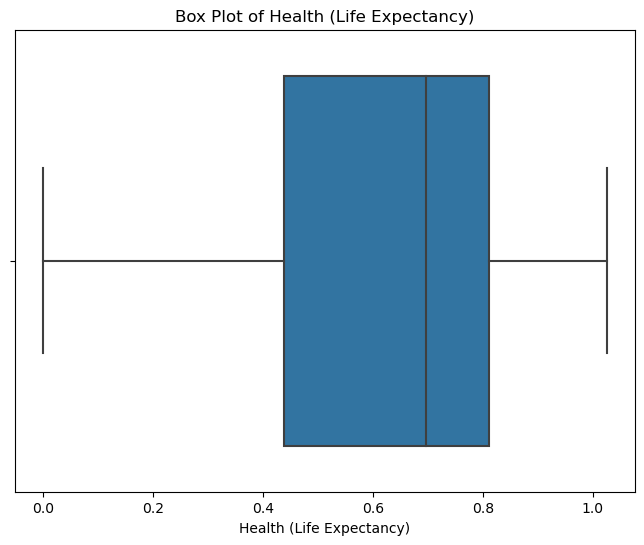

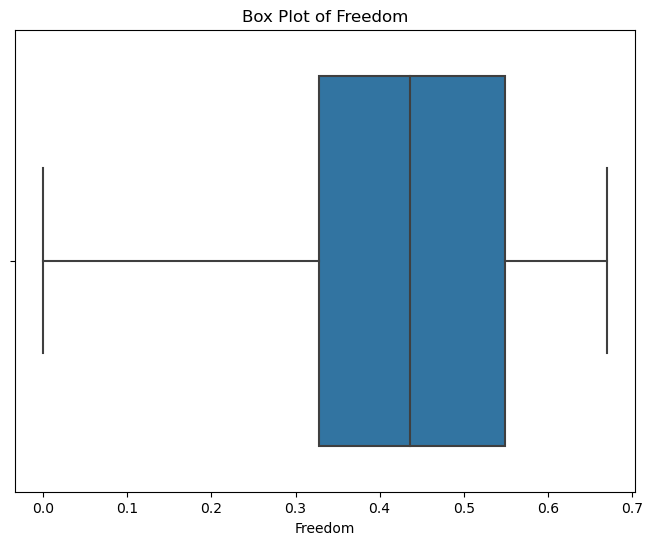

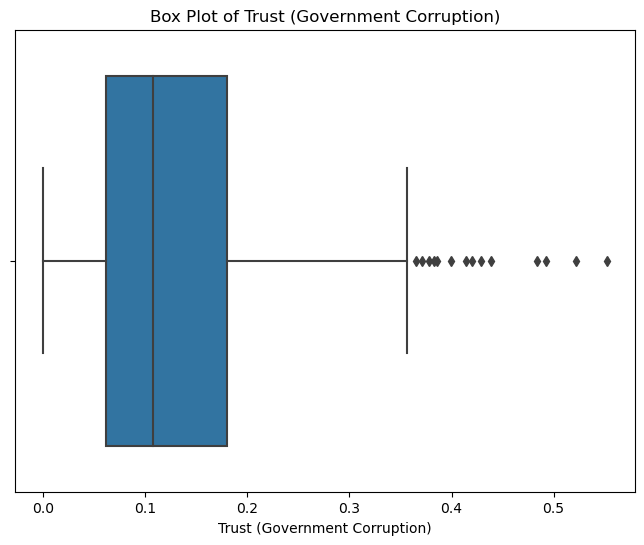

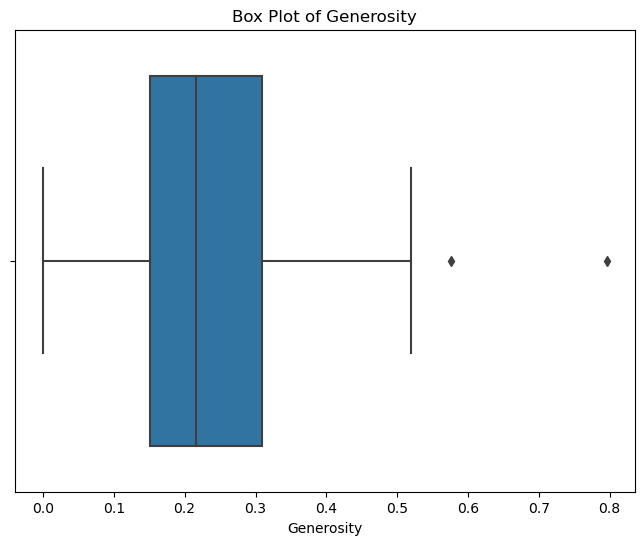

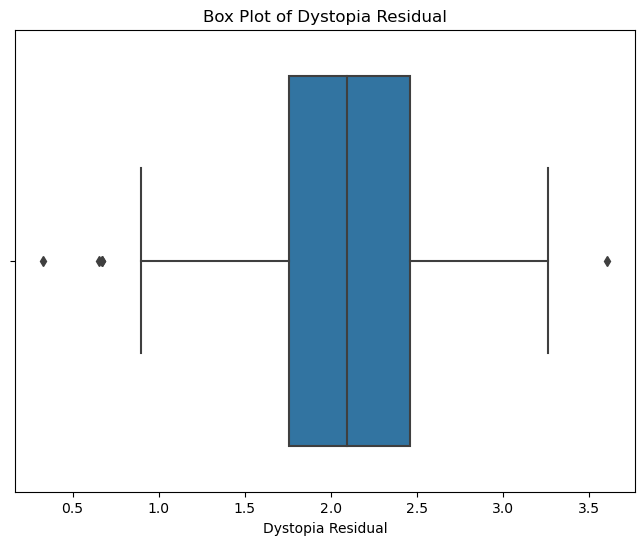

In [8]:
# Box Plots
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Box Plot of {feature}")
    plt.xlabel(feature)
    plt.show()

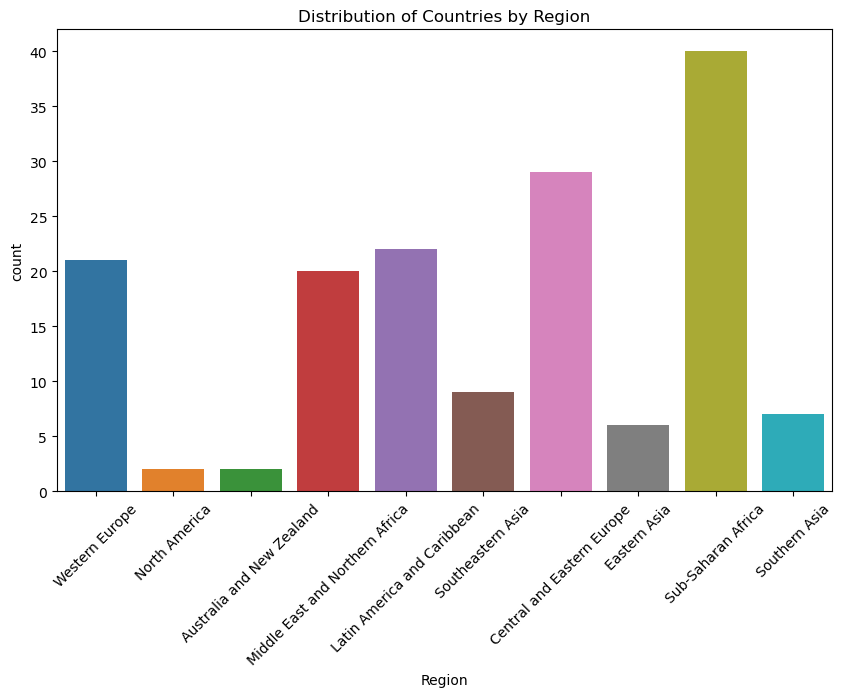

In [10]:
# Bar Plots
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=data)
plt.title("Distribution of Countries by Region")
plt.xticks(rotation=45)
plt.show()


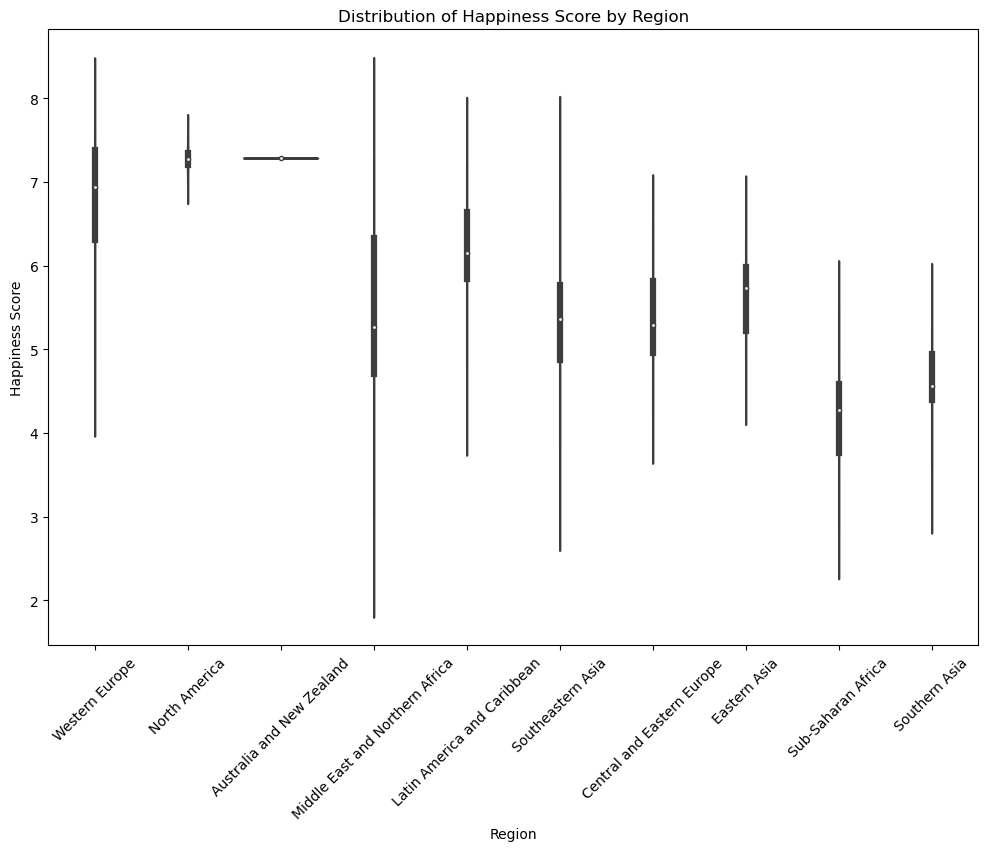

In [11]:
# Distribution Comparison
plt.figure(figsize=(12, 8))
sns.violinplot(x='Region', y='Happiness Score', data=data)
plt.title("Distribution of Happiness Score by Region")
plt.xticks(rotation=45)
plt.show()

# Model Selection - Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest Regressor to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_regressor.predict(X_test)

#Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=['Country', 'Region'])
# Drop the row containing 'Myanmar' from the dataset
data = data[data['Country'] != 'Myanmar']


# Model Evaluation

In [55]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.031449062499999764
Root Mean Squared Error: 0.053231232226719945
R-squared: 0.998002775158104


# Analysis on Evaluation Metrics on the Random Forest Regression Model

Based on the evaluation metrics, my Random Forest regression model with feature selection demonstrates high accuracy in predicting the Happiness Score.

- Mean Absolute Error (MAE): The average absolute difference between the actual Happiness Score and the predicted Happiness Score is approximately 0.0314. This indicates that, on average, the model's predictions are off by around 0.0314 units of Happiness Score.

- Root Mean Squared Error (RMSE): The square root of the average squared difference between the actual and predicted Happiness Scores is approximately 0.0532. RMSE provides a measure of the spread of the residuals and indicates how close the predicted values are to the actual values.

- R-squared (R^2): The coefficient of determination is approximately 0.998. R-squared represents the proportion of the variance in the dependent variable (Happiness Score) that is predictable from the independent variables (features). An R-squared value close to 1 indicates that the model explains a high percentage of the variance in the target variable.

Overall, these evaluation metrics suggests that the Random Forest regression model is fitting the data very well and making highly accuate predictions of the Happiness socre.


# Prodictive Modeling - Predicting Happiness Score

In [50]:
# Prediction
predictions = model.predict(X_test)

# Create a DataFrame with actual and predicted happiness scores
results_rdata = pd.DataFrame({
    'Actual Happiness Score': y_test,
    'Predicted Happiness Score': predictions,
})

# Display the DataFrame
results_rdata.head(20)

,Actual Happiness Score,Predicted Happiness Score
128,4.307,4.137272
45,5.987,6.097241
134,4.194,4.039705
156,2.905,3.353406
90,5.057,5.094814
29,6.574,6.579890
96,4.898,5.009918
98,4.876,4.859319
95,4.949,4.922389
140,3.931,3.900026


# Analysis on Happiness Score
These two rows from your dataset show the actual Happiness Score and the corresponding Predicted Happiness Score:

- Row 128:
- - Actual Happiness Score: 4.307
- - Predicted Happiness Score: 4.137272

- Row 45:
- - Actual Happiness Score: 5.987
- - Predicted Happiness Score: 6.097241

For both rows, the actual and predicted happiness scores are very close, indicating that the model's predictions are relatively accurate. However, there are slight differences between the actual and predicted values, suggesting that the model may not capture all the variability in the data. These differences could be due to various factors, including noise in the data, model limitations, or inherent unpredictability in human happiness.For both rows, the actual and predicted happiness scores are very close, indicating that the model's predictions are relatively accurate.